In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print('Finsihed loading libraries')

Finsihed loading libraries


# ReadData

In [2]:
data = pd.read_csv("IMDB_movies.csv", encoding = "ISO-8859-1", dtype='unicode' )

data['genre'] = data.genre.map({'Horror':'Horror', 'Comedy, Romance':'Comedy, Romance'}) 
data = data[['description', 'genre']]
data = data.dropna(how='any',axis=0) 
print(data.shape)
data.head(10)


(4658, 2)


,description,genre
29,"In this version of the golem legend, the golem...",Horror
78,"A young couple attempts to elope, with the bri...","Comedy, Romance"
92,"After years travelling the world, Count Greven...",Horror
114,Amarilly comes from a large family in a workin...,"Comedy, Romance"
126,"A young girl, stifling on her father's backwoo...","Comedy, Romance"
131,A Pair of Silk Stockings is a 1918 American si...,"Comedy, Romance"
162,"A teenaged tomboy, tired of being bossed aroun...","Comedy, Romance"
191,EROTIKON surely pushed the boundaries of what ...,"Comedy, Romance"
195,Extremely rare work of Robert Wiene. From the ...,Horror
205,Somewhere in Southern Bavaria Xaver wants to m...,"Comedy, Romance"


In [3]:
import string
import re
import nltk
stopword = nltk.corpus.stopwords.words('english')# All English Stopwords
ps = nltk.PorterStemmer()
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text
def clean_text(text):
    #text = text.replace("</br>", " ")
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopword]
    return text

In [4]:
from sklearn.feature_extraction import _stop_words
stopwords = _stop_words.ENGLISH_STOP_WORDS
def clean(doc): # doc is a string of text
    doc = doc.replace("</br>", " ") # This text contains a lot of <br/> tags.
    doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])
    doc = " ".join([token for token in doc.split() if token not in stopwords])
    # remove punctuation and numbers
    return doc

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
stopword = nltk.corpus.stopwords.words('english')

# Splitting data

In [6]:
#Training and output
x = data.description # the feature that contains textual data.
y = data.genre # the output column. 
print(x.shape, y.shape)
data.shape
data = data[['description', 'genre']] # Let us take only the two columns we need.
print(data.shape)
print(data.head(5))

(4658,) (4658,)
(4658, 2)
                                           description            genre
29   In this version of the golem legend, the golem...           Horror
78   A young couple attempts to elope, with the bri...  Comedy, Romance
92   After years travelling the world, Count Greven...           Horror
114  Amarilly comes from a large family in a workin...  Comedy, Romance
126  A young girl, stifling on her father's backwoo...  Comedy, Romance


# TF-IDF

In [7]:



from sklearn.feature_extraction.text import TfidfVectorizer
#create an object/instance
tf_vectorizer = TfidfVectorizer(analyzer=clean_text)
#get tf -idf values
X_counts = tf_vectorizer.fit_transform(data['description'])
featureNames = tf_vectorizer.get_feature_names()
print( featureNames)
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=tf_vectorizer.get_feature_names())
X_counts_df.head()


['', '1', '10', '100', '1000', '1000000', '104', '10stori', '10th', '10year', '11', '12', '121', '121212', '12th', '13', '13th', '13yearold', '14', '14th', '14yearold', '15', '1500', '1565', '1589', '15th', '15thcenturi', '15yearold', '15yearsago', '16', '160', '1600', '1619', '1671', '1692', '1695', '16th', '16yearold', '17', '1710', '1786', '1795', '17th', '17thcenturi', '17year', '17yearold', '18', '1800', '1830', '1846', '1858', '1860', '1865', '1870', '1877', '1885', '1890', '1893', '1895', '18th', '19', '1900', '1902', '1905', '1910', '1912', '1916', '1918', '1920', '1926', '1928', '1930', '1937', '1938', '1941', '1944', '1945', '1950', '1951', '1953', '1956', '1960', '1962', '1963', '1964', '1968', '1968even', '1969', '1970', '1972', '1974', '1978', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1996', '1998', '1999', '19th', '19thcenturi', '19yearold', '2', '20', '200', '2000', '2004', '2006', '2007', '20

,,1,10,100,1000,1000000,104,10stori,10th,10year,...,zoya,zubir,zulfiy,zulfu,zulu,zurikela,zã,â,ã,ã¼ber
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.094552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.097533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
print(X_counts.shape)


(4658, 11159)


# CountVec (Bag Of Words)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['description'])
print(X_counts.toarray())
featureNames = count_vect.get_feature_names()
print(featureNames)
X_count_df = pd.DataFrame(X_counts.toarray(), columns=count_vect.get_feature_names())
X_counts_df.head()

[[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['', '1', '10', '100', '1000', '1000000', '104', '10stori', '10th', '10year', '11', '12', '121', '121212', '12th', '13', '13th', '13yearold', '14', '14th', '14yearold', '15', '1500', '1565', '1589', '15th', '15thcenturi', '15yearold', '15yearsago', '16', '160', '1600', '1619', '1671', '1692', '1695', '16th', '16yearold', '17', '1710', '1786', '1795', '17th', '17thcenturi', '17year', '17yearold', '18', '1800', '1830', '1846', '1858', '1860', '1865', '1870', '1877', '1885', '1890', '1893', '1895', '18th', '19', '1900', '1902', '1905', '1910', '1912', '1916', '1918', '1920', '1926', '1928', '1930', '1937', '1938', '1941', '1944', '1945', '1950', '1951', '1953', '1956', '1960', '1962', '1963', '1964', '1968', '1968even', '1969', '1970', '1972', '1974', '1978', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '

,,1,10,100,1000,1000000,104,10stori,10th,10year,...,zoya,zubir,zulfiy,zulfu,zulu,zurikela,zã,â,ã,ã¼ber
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.094552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.097533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
print(X_count_df.shape)


(4658, 11159)


In [11]:

x_train, x_test, y_train, y_test = train_test_split(X_counts, y, test_size=0.2,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3726, 11159)
(3726,)
(932, 11159)
(932,)


# Naive bayes

In [12]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(x_train, y_train) # train the model(timing it with an IPython "magic command")


MultinomialNB()

In [13]:
y_pred_class = nb.predict(x_test) # make class predictions for X_test_dtm

print(y_pred_class[0:5])


['Horror' 'Comedy, Romance' 'Horror' 'Horror' 'Comedy, Romance']


In [14]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.9259656652360515


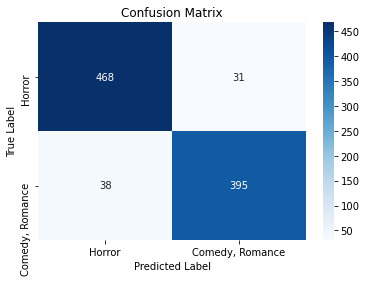

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Horror", "Comedy, Romance"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# logestic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(class_weight="balanced") # instantiate a logistic regression model
logreg.fit(x_train, y_train) # fit the model with training data
y_pred_class = logreg.predict(x_test)


In [17]:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))

Accuracy:  0.9152360515021459


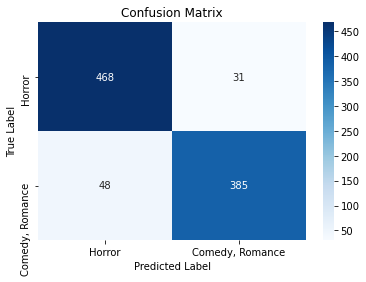

In [18]:
cm = confusion_matrix(y_test, y_pred_class)
class_label = ["Horror", "Comedy, Romance"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()